In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
def Laplacian(A : np.array):
  D = np.diag(np.sum(A, axis = 1))
  L = D - A
  return L

In [3]:
def Laplacian_sym(A : np.array):
  D_inv_sqrt = np.diag(1 / (np.sqrt(np.sum(A, axis = 1)) + 1e-10))
  L = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt
  return L

In [36]:
def spectral_clustering(A : np.array, k : int = 2) -> np.array:

  L = Laplacian(A)

  # Initialization of the smallest eigen matrix
  v, U = np.linalg.eigh(L) # V : eigen values , U : eigen vector matrix
  v_idx = np.argsort(v)
  U = U[:, v_idx]
  U_k = U[:, : k] # eigen vectors of k smallest eigen values

  # K-means
  kmeans = KMeans(n_clusters = k, random_state = 0).fit(U_k)
  return kmeans.labels_

In [37]:
def normalized_spectral_clustering(A : np.array, k  : int = 2) -> np.array:
  L = Laplacian_sym(A)

  # Initialization of the smallest eigen matrix
  v, U = np.linalg.eig(L) # V : eigen values , U : eigen vector matrix
  U = U[:, np.argsort(v)]
  U_k = U[:, : k] # eigen vectors of k smallest eigen values

  T_k = normalize(U_k, norm="l2")

  # K-means
  kmeans = KMeans(n_clusters = k, random_state = 0).fit(T_k)
  return kmeans.labels_

In [38]:
def ER(num_nodes : int, r : int):
  # probability and graph matrices
  Prob = np.random.rand(num_nodes, num_nodes)
  Prob  = (Prob + Prob.T) / 2
  A = np.zeros((num_nodes, num_nodes))

  A[Prob < r] = 1
  return A

In [39]:
A = ER(30, 0.25)

In [40]:
unnorm_clusters = spectral_clustering(A, 3)
norm_clusters = normalized_spectral_clustering(A, 3)

In [41]:
def clusters_vis(cluster : np.array):
  unique_clusters = list(set(norm_clusters))
  color_map = cm.get_cmap('tab10', len(unique_clusters))  # Use a colormap with distinct colors
  node_colors = [color_map(norm_clusters[i]) for i in range(len(norm_clusters))]
  return unique_clusters, color_map, node_colors


<ipython-input-41-989e2bc8f24d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(unique_clusters))  # Use a colormap with distinct colors


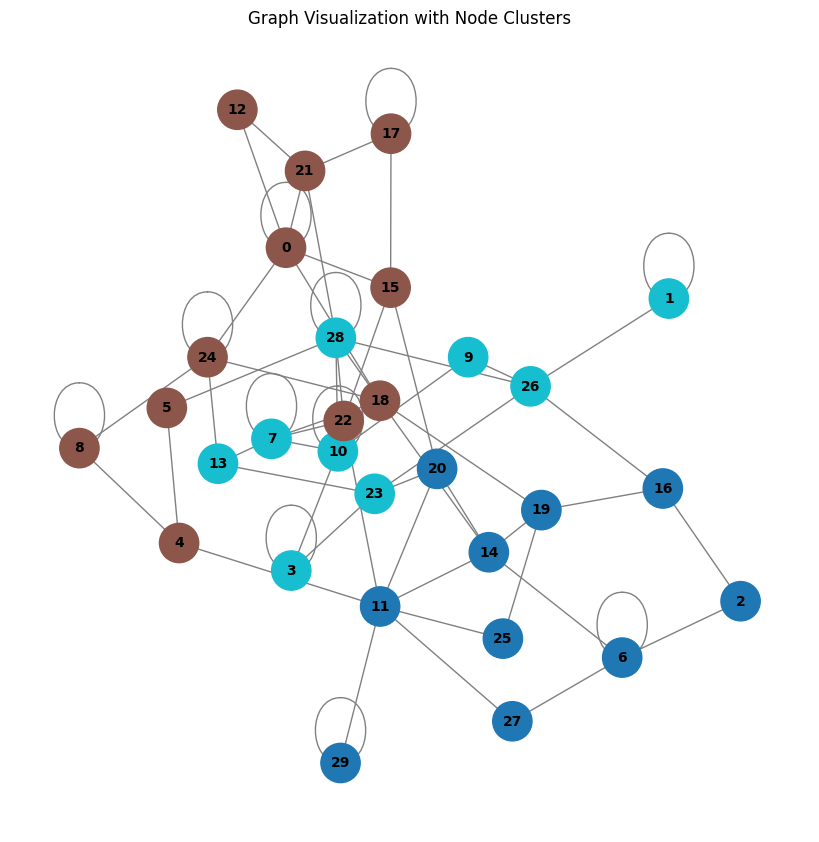

In [42]:
import scipy.sparse as sp
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Step 1: Create a sparse adjacency matrix
# Example sparse adjacency matrix
adj_matrix = sp.csr_matrix(A)

graph = nx.Graph(adj_matrix)  # Directly pass the sparse matrix to create a graph


unique_clusters, color_map, node_colors = clusters_vis(norm_clusters)

# Step 5: Visualize the graph with nodes colored by cluster
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph, seed=42)  # Layout for better visualization

nx.draw(
    graph,
    pos,
    with_labels=True,
    node_color=node_colors,  # Color nodes based on their cluster
    node_size=800,
    edge_color="gray",
    font_size=10,
    font_weight="bold"
)
plt.title("Graph Visualization with Node Clusters")
plt.show()

<ipython-input-41-989e2bc8f24d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(unique_clusters))  # Use a colormap with distinct colors


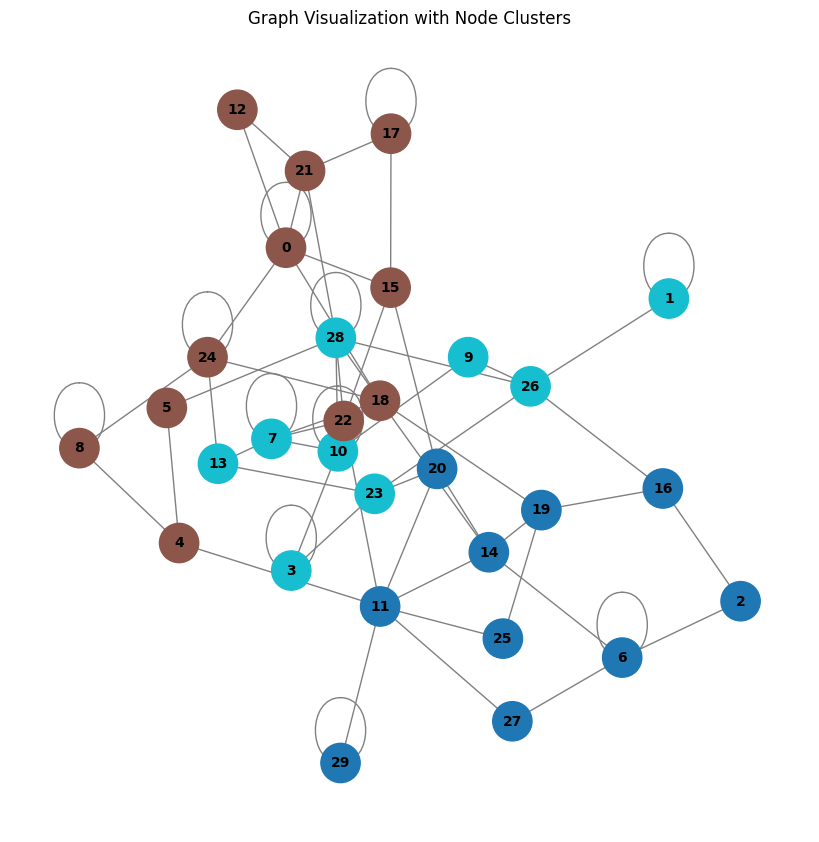

In [43]:
unique_clusters, color_map, node_colors = clusters_vis(unnorm_clusters)

# Step 5: Visualize the graph with nodes colored by cluster
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph, seed=42)  # Layout for better visualization

nx.draw(
    graph,
    pos,
    with_labels=True,
    node_color=node_colors,  # Color nodes based on their cluster
    node_size=800,
    edge_color="gray",
    font_size=10,
    font_weight="bold"
)
plt.title("Graph Visualization with Node Clusters")
plt.show()